# Part 2: RFM Analysis with K Means Clustering

## Import Libraries

In [1]:

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

from sklearn.metrics import silhouette_score
from matplotlib.colors import ListedColormap
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree

from mpl_toolkits import mplot3d

## Load Data

In [2]:
# load cleaned and processed data from notebook1
customers_rfm = pd.read_csv('../data/customersrfm.csv')
customers_rfm.head()

,Customer ID,Recency,Frequency,Monetary,log_r,log_f,log_m
0,12346,326,3,77352.96,5.786897,1.098612,11.256134
1,12608,405,1,415.79,6.003887,0.000000,6.030180
2,12745,487,2,723.85,6.188264,0.693147,6.584584
3,12746,541,1,254.55,6.293419,0.000000,5.539497
4,12747,3,26,8898.48,1.098612,3.258097,9.093636


In [3]:
# load cleaned and processed data from notebook1
retail_df = pd.read_csv('../data/retail_cleaned_preprocessed.csv')
retail_df.head()

,Invoice,StockCode,Quantity,Invoice DateTime,Price,Customer ID,Country,Stock Description,Amount,Invoice Date,Month,Day of Week,Hour
0,489434,85048,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,15CM CHRISTMAS GLASS BALL 20 LIGHTS,83.4,2009-12-01,12,1,7
1,489434,22064,24,2009-12-01 07:45:00,1.65,13085,United Kingdom,PINK DOUGHNUT TRINKET POT,39.6,2009-12-01,12,1,7
2,489434,21523,10,2009-12-01 07:45:00,5.95,13085,United Kingdom,DOORMAT FANCY FONT HOME SWEET HOME,59.5,2009-12-01,12,1,7
3,489434,79323W,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,WHITE CHERRY LIGHTS,81.0,2009-12-01,12,1,7
4,489434,21871,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,SAVE THE PLANET MUG,30.0,2009-12-01,12,1,7


## Data Vizualizations for RFM

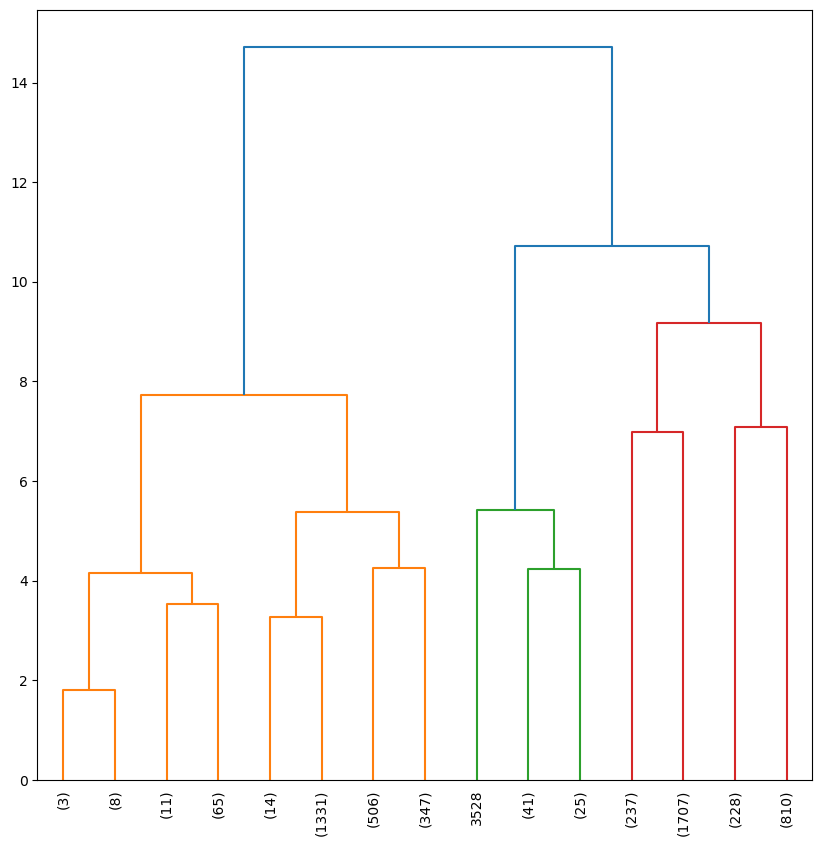

<Figure size 640x480 with 0 Axes>

In [4]:
#DENDROGRAM
plt.figure(figsize=(10,10))
d = linkage(customers_rfm[['log_r', 'log_f','log_m']], method='complete')
dendrogram(d,
          leaf_rotation=90,
          leaf_font_size=10,
          truncate_mode = 'level', p = 3)
plt.show()
plt.savefig("../images/dendrogram.png")

### 2D Comparisions

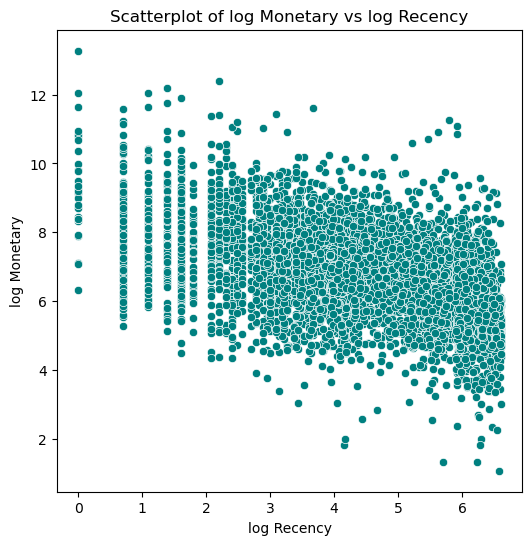

In [8]:
# Plot the scatter log monetary vs recency (from the left view)
plt.figure(figsize=(6,6))
sns.scatterplot(data=customers_rfm, x="log_r", y="log_m", color='teal')
plt.xlabel("log Recency")
plt.ylabel("log Monetary")
plt.title('Scatterplot of log Monetary vs log Recency');


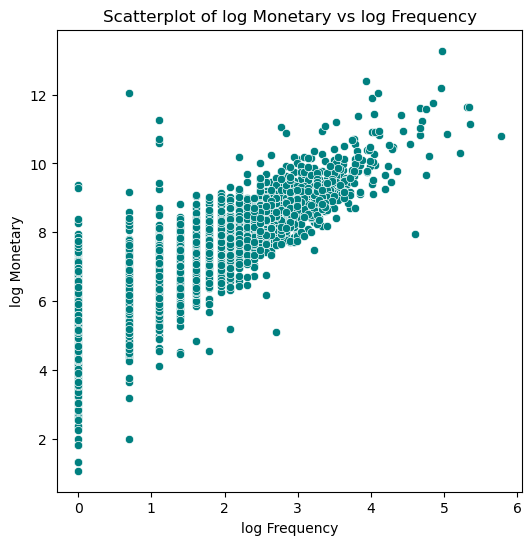

In [9]:
# Plot the scatter of log monetary vs freq (from the right view)
plt.figure(figsize=(6,6))
sns.scatterplot(data=customers_rfm, x="log_f", y="log_m", color='teal')
plt.xlabel("log Frequency")
plt.ylabel("log Monetary")
plt.title('Scatterplot of log Monetary vs log Frequency');

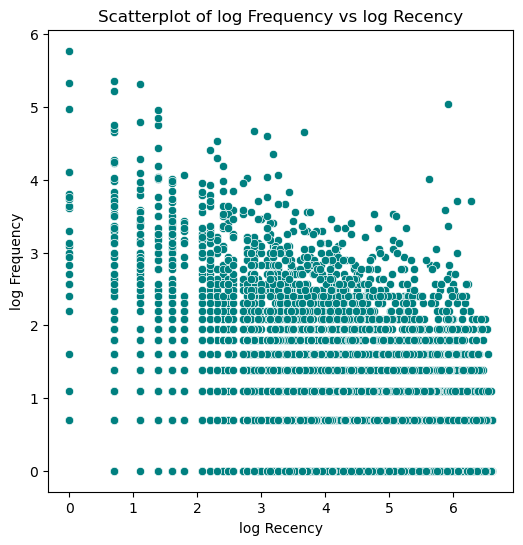

In [10]:
# Plot the scatter of Log freq vs rece (top view of the cube)
plt.figure(figsize=(6,6))
sns.scatterplot(data=customers_rfm, x="log_r", y="log_f", color='teal')
plt.xlabel("log Recency")
plt.ylabel("log Frequency")
plt.title('Scatterplot of log Frequency vs log Recency');

### 3D Comparisons

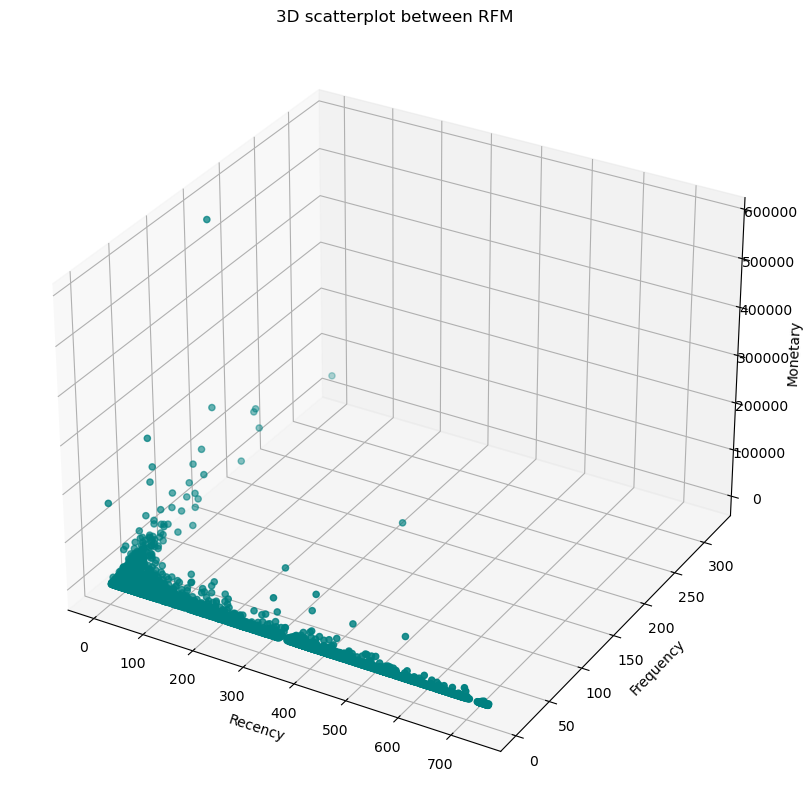

In [5]:
plt.figure(figsize=(10,10))
axes = plt.axes(projection='3d')
axes.scatter(customers_rfm.Recency, customers_rfm.Frequency, customers_rfm.Monetary, color='teal')
axes.set_xlabel("Recency")
axes.set_ylabel("Frequency")
axes.set_zlabel("Monetary")
plt.title('3D scatterplot between RFM');
plt.savefig("../images/3DPlotRFM.png");

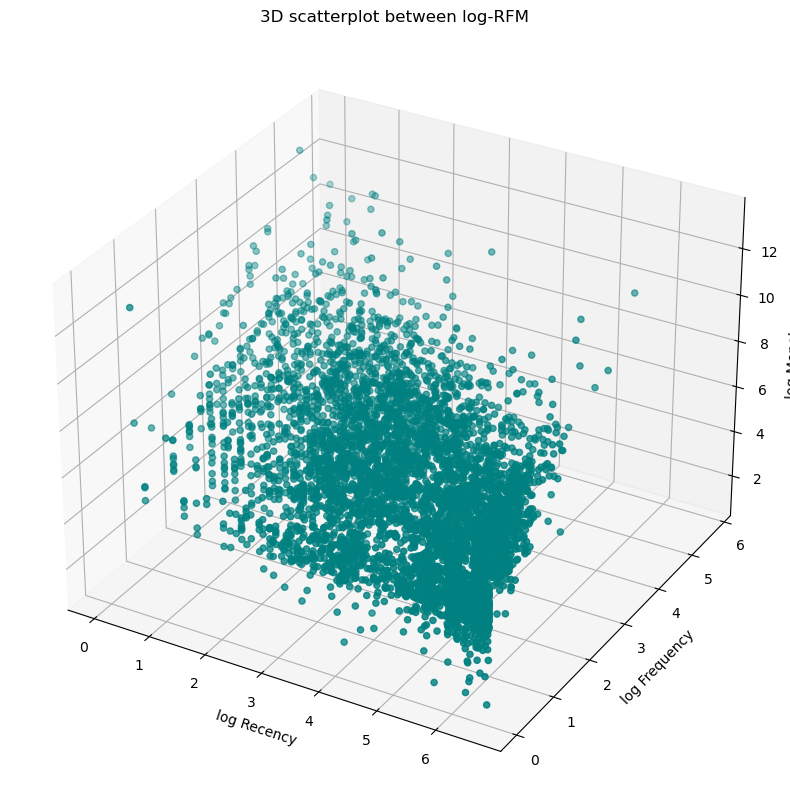

In [6]:
plt.figure(figsize=(10,10))
axes = plt.axes(projection='3d')
axes.scatter(customers_rfm.log_r, customers_rfm.log_f, customers_rfm.log_m, color='teal')
axes.set_xlabel("log Recency")
axes.set_ylabel("log Frequency")
axes.set_zlabel("log Monetary")
plt.title('3D scatterplot between log-RFM');
plt.savefig("../images/3DPlotLogRFM.png");

In [13]:
# IMPORTANT: set index to customer number
features = ['log_r', 'log_f', 'log_m']
customers_rfm.set_index('Customer ID', inplace = True)

In [14]:
data = customers_rfm[features]
ss = StandardScaler()
data_sc = ss.fit_transform(data)

In [15]:
scores = []
for k in range(2, 10):
    cl = KMeans(n_clusters=k)
    cl.fit(data)
    inertia = cl.inertia_
    sil = silhouette_score(data, cl.labels_)
    scores.append([k, inertia, sil])
    
score_df = pd.DataFrame(scores)
score_df.columns = ['k', 'inertia', 'silhouette']

C:\Users\praha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\praha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\praha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\praha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

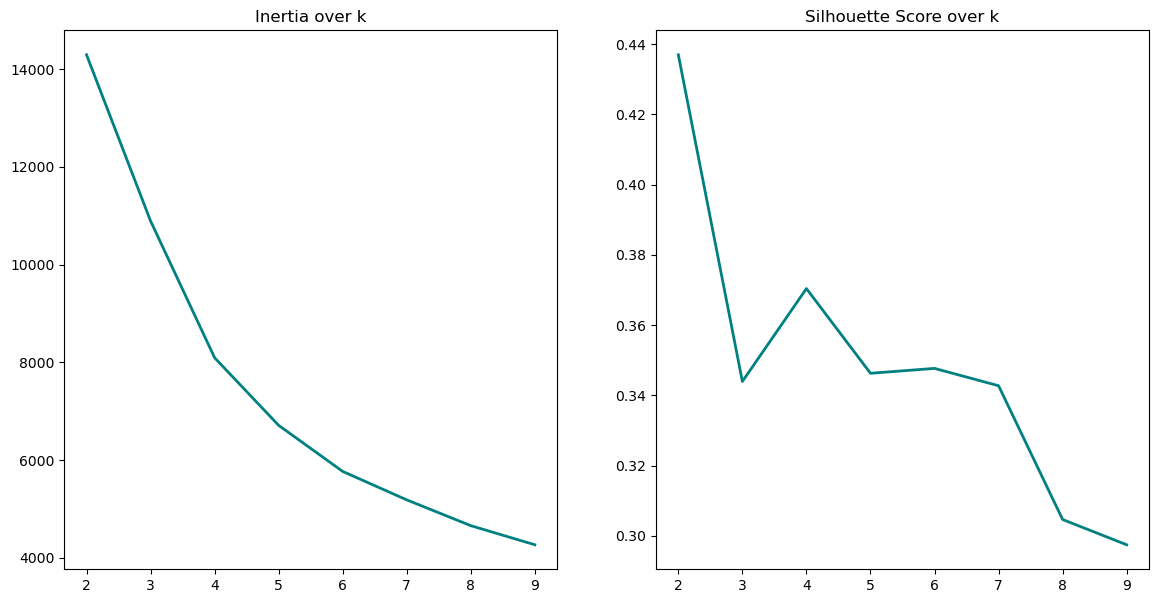

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(14, 7))
axes[0].plot(score_df.k, score_df.inertia, color='teal', linewidth=2)
axes[0].set_title('Inertia over k')
axes[1].plot(score_df.k, score_df.silhouette, color='teal', linewidth=2);
axes[1].set_title('Silhouette Score over k')
plt.savefig("../images/silhoutte_over_k.png")

In [18]:
# display the scores
score_df.head()

,k,inertia,silhouette
0,2,14292.009331,0.436971
1,3,10891.295091,0.343951
2,4,8092.943134,0.370403
3,5,6709.362959,0.346286
4,6,5766.560179,0.347674


#### Comment:
Based on Silhouette score, we will choose K = 4 as it has a decent score with more clustering.

In [19]:
km = KMeans(n_clusters=4, random_state=2024)
km.fit(data_sc)

C:\Users\praha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=2024)

In [20]:
customers_rfm['Cluster'] = km.labels_ + 1

In [21]:
customers_rfm.head()

,Recency,Frequency,Monetary,log_r,log_f,log_m,Cluster
Customer ID,,,,,,,
12346,326,3,77352.96,5.786897,1.098612,11.256134,3
12608,405,1,415.79,6.003887,0.000000,6.030180,2
12745,487,2,723.85,6.188264,0.693147,6.584584,2
12746,541,1,254.55,6.293419,0.000000,5.539497,2
12747,3,26,8898.48,1.098612,3.258097,9.093636,4


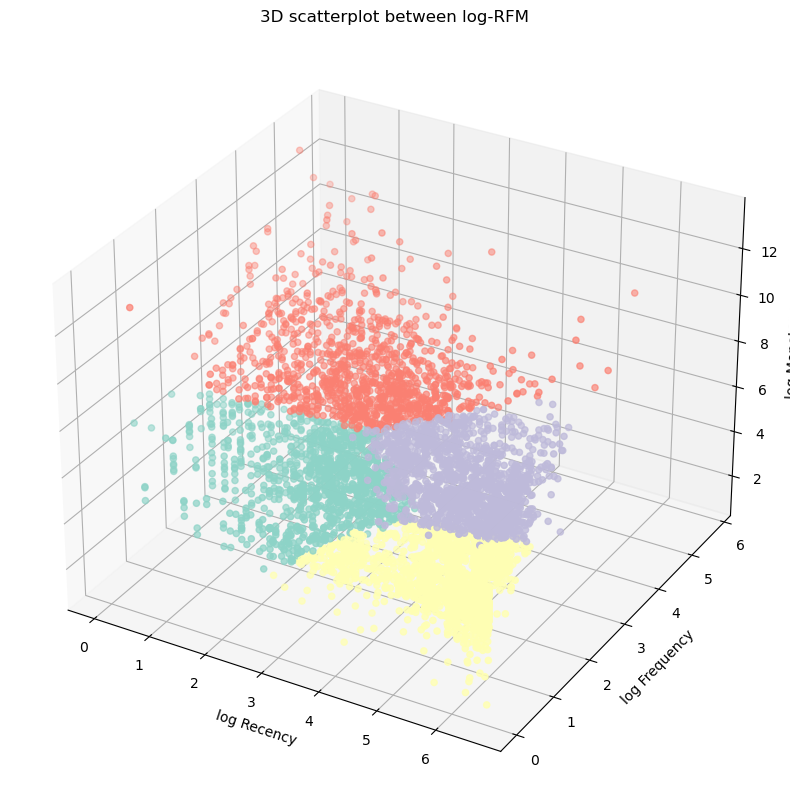

In [22]:
plt.figure(figsize=(10,10))
axes = plt.axes(projection='3d')
cmap = ListedColormap(sns.color_palette("Set3", 256).as_hex())
axes.scatter(customers_rfm.log_r, customers_rfm.log_f, customers_rfm.log_m, c=customers_rfm['Cluster'], cmap=cmap)
axes.set_xlabel("log Recency")
axes.set_ylabel("log Frequency")
axes.set_zlabel("log Monetary")
plt.title('3D scatterplot between log-RFM')
plt.savefig("../images/3dplot.png");

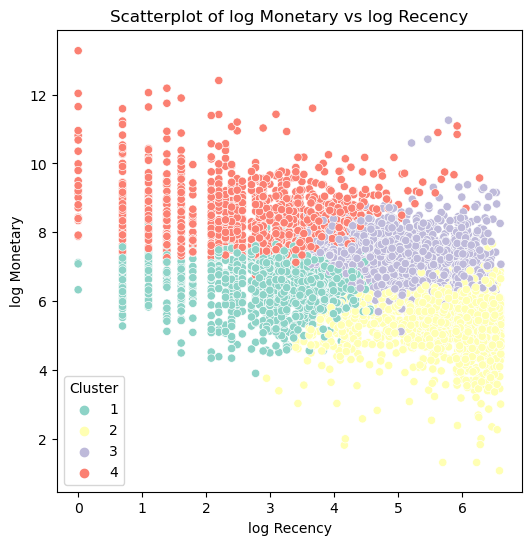

In [23]:
# Plot the scatter log monetary vs recency (from the left view)
plt.figure(figsize=(6,6))
sns.scatterplot(data=customers_rfm, x="log_r", y="log_m", hue='Cluster', palette='Set3')
plt.xlabel("log Recency")
plt.ylabel("log Monetary")
plt.title('Scatterplot of log Monetary vs log Recency')
plt.savefig("../images/logm_logr.png");

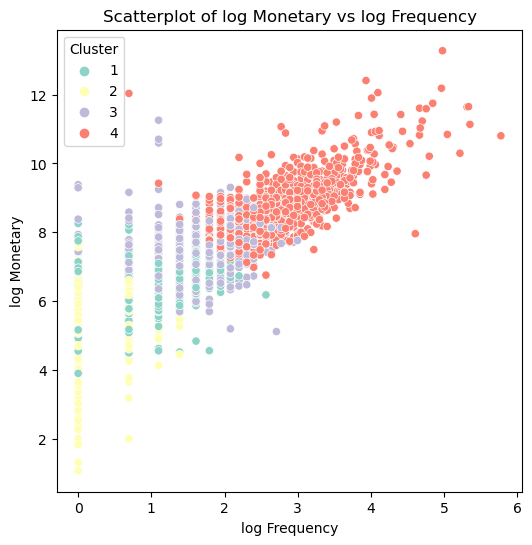

In [24]:
# Plot the scatter of log monetary vs freq (from the right view)
plt.figure(figsize=(6,6))
sns.scatterplot(data=customers_rfm, x="log_f", y="log_m", hue='Cluster', palette='Set3')
plt.xlabel("log Frequency")
plt.ylabel("log Monetary")
plt.title('Scatterplot of log Monetary vs log Frequency')
plt.savefig("../images/logm_logf.png");

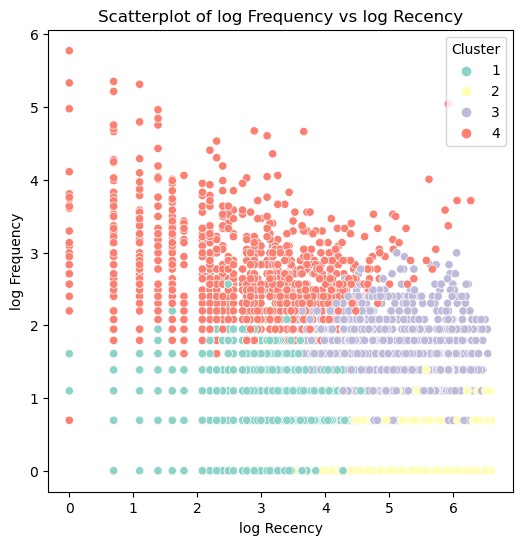

In [25]:
# Plot the scatter of Log freq vs rece (top view of the cube)
plt.figure(figsize=(6,6))
sns.scatterplot(data=customers_rfm, x="log_r", y="log_f", hue='Cluster', palette='Set3')
plt.xlabel("log Recency")
plt.ylabel("log Frequency")
plt.title('Scatterplot of log Frequency vs log Recency')
plt.savefig("../images/logf_logr.png");

C:\Users\praha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


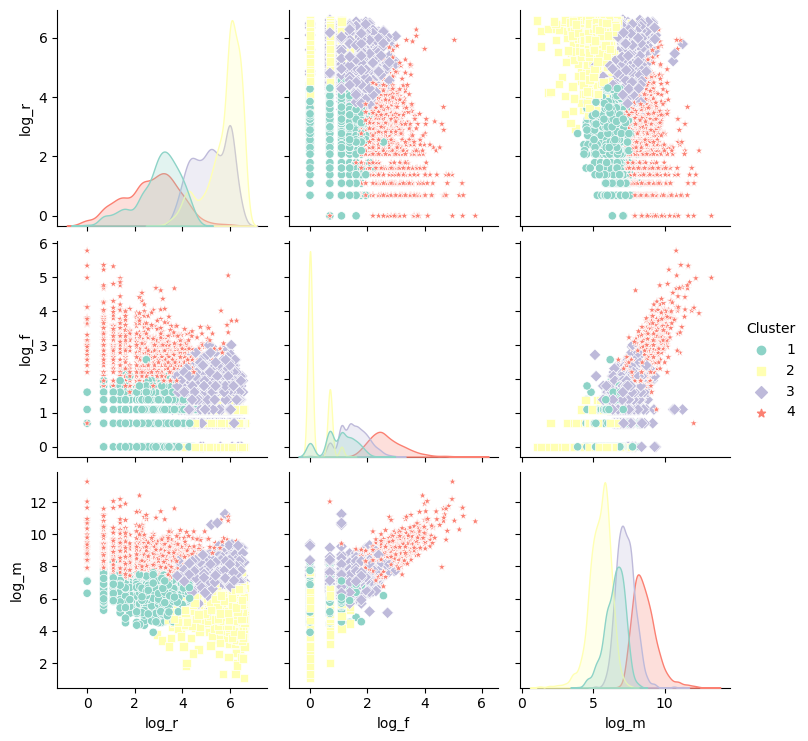

In [26]:
sns.pairplot(customers_rfm[['log_r','log_f','log_m','Cluster']], hue='Cluster', markers=["o", "s", "D", "*"], palette=sns.color_palette('Set3', n_colors=4))
plt.savefig("../images/pairplot.png");

#### Insights:
Cluster 1: Low Recency, Low Frequency, Low Monetary Value. 
- Purchased recently, having low frequency and monetary value. They could be new customers who just made a few orders. Company could look into retaining these customers with more new comer benefits.


Cluster 2: High Recency, Low Frequency, Low Monetary Value.
- Purchased long ago, having low frequency and monetary value. They are probably customers that are lost.


Cluster 3: High Recency, decent Frequency, decent Monetary value.
- Purchased long ago, having decent frequency and monetary value. They could also be churned customers, however, they are the better customers in terms of sales volume, they could even be loyal customers previously. Company can look into reconnecting with these customers.


Cluster 4: Low Recency, High Frequency, High Monetary Value.
- Purchased recently, having high frequency and monetary value. They are the loyal big and frequent customers and probably the most important customers that the company has to retain.

In [27]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699606 entries, 0 to 699605
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Invoice            699606 non-null  int64  
 1   StockCode          699606 non-null  object 
 2   Quantity           699606 non-null  int64  
 3   Invoice DateTime   699606 non-null  object 
 4   Price              699606 non-null  float64
 5   Customer ID        699606 non-null  int64  
 6   Country            699606 non-null  object 
 7   Stock Description  699606 non-null  object 
 8   Amount             699606 non-null  float64
 9   Invoice Date       699606 non-null  object 
 10  Month              699606 non-null  int64  
 11  Day of Week        699606 non-null  int64  
 12  Hour               699606 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 69.4+ MB


In [28]:
retail_df_cluster = retail_df.merge(customers_rfm,how='left',on='Customer ID')

In [29]:
retail_df_cluster.head()

,Invoice,StockCode,Quantity,Invoice DateTime,Price,Customer ID,Country,Stock Description,Amount,Invoice Date,Month,Day of Week,Hour,Recency,Frequency,Monetary,log_r,log_f,log_m,Cluster
0,489434,85048,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,15CM CHRISTMAS GLASS BALL 20 LIGHTS,83.4,2009-12-01,12,1,7,158,8,2433.28,5.062595,2.079442,7.796995,3
1,489434,22064,24,2009-12-01 07:45:00,1.65,13085,United Kingdom,PINK DOUGHNUT TRINKET POT,39.6,2009-12-01,12,1,7,158,8,2433.28,5.062595,2.079442,7.796995,3
2,489434,21523,10,2009-12-01 07:45:00,5.95,13085,United Kingdom,DOORMAT FANCY FONT HOME SWEET HOME,59.5,2009-12-01,12,1,7,158,8,2433.28,5.062595,2.079442,7.796995,3
3,489434,79323W,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,WHITE CHERRY LIGHTS,81.0,2009-12-01,12,1,7,158,8,2433.28,5.062595,2.079442,7.796995,3
4,489434,21871,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,SAVE THE PLANET MUG,30.0,2009-12-01,12,1,7,158,8,2433.28,5.062595,2.079442,7.796995,3


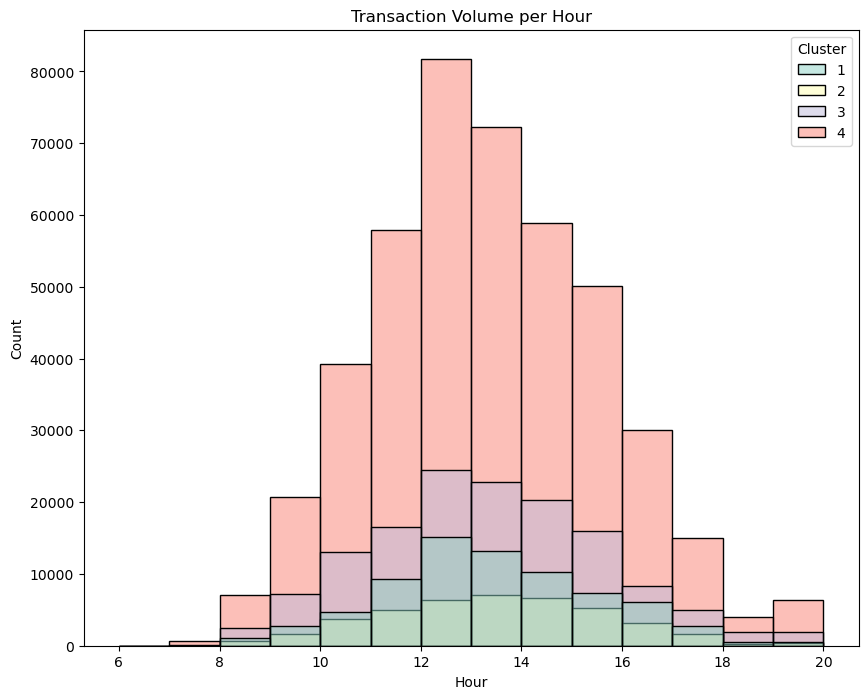

In [53]:
# plot transaction volume by hour
plt.figure(figsize=(10,8))
sns.histplot(retail_df_cluster, x='Hour', hue='Cluster', palette='Set3', binrange=(6, 20), binwidth=1)
plt.title('Transaction Volume per Hour');

In [31]:
# aggregate metrics on each customer
summary_cluster_1 = retail_df_cluster.groupby(['Cluster']).agg(
    Count_Invoice = ('Invoice', 'nunique'), 
    Count_Product = ('StockCode', 'nunique'), 
    Count_Customer = ('Customer ID', 'nunique'),
    Count_Days = ('Invoice Date', 'nunique'),
    Total_Quantity = ('Quantity', 'sum'), 
    Total_Amount = ('Amount', 'sum')
    ).reset_index()

In [32]:
# aggregate metrics on each customer
summary_cluster_2 = customers_rfm.groupby(['Cluster']).agg(
    Mean_Recency = ('Recency', 'mean'), # for recency 
    Mean_Frequency = ('Frequency', 'mean'), # for frequency
    Mean_Monetary = ('Monetary', 'mean') # for monetary
    ).reset_index()

In [33]:
# merge these summary tables
summary_cluster = summary_cluster_1.merge(summary_cluster_2, on='Cluster')
summary_cluster

,Cluster,Count_Invoice,Count_Product,Count_Customer,Count_Days,Total_Quantity,Total_Amount,Mean_Recency,Mean_Frequency,Mean_Monetary
0,1,3310,3792,1061,533,549712,869837.67,28.110273,3.119698,819.828153
1,2,2372,3801,1802,548,326352,544034.36,389.302997,1.316315,301.905860
2,3,7078,4295,1380,577,1598074,2536642.00,233.560145,5.128986,1838.146377
3,4,20601,4506,1091,604,6048239,10337692.87,27.274060,18.882676,9475.428845


In [34]:
summary_cluster.set_index('Cluster',inplace=True)
summary_cluster

,Count_Invoice,Count_Product,Count_Customer,Count_Days,Total_Quantity,Total_Amount,Mean_Recency,Mean_Frequency,Mean_Monetary
Cluster,,,,,,,,,
1,3310,3792,1061,533,549712,869837.67,28.110273,3.119698,819.828153
2,2372,3801,1802,548,326352,544034.36,389.302997,1.316315,301.905860
3,7078,4295,1380,577,1598074,2536642.00,233.560145,5.128986,1838.146377
4,20601,4506,1091,604,6048239,10337692.87,27.274060,18.882676,9475.428845


In [35]:
summary_cluster['Avg Sales Amt per Trans'] = summary_cluster.Total_Amount / summary_cluster.Count_Invoice
summary_cluster['Avg Sales Qty per Trans'] = summary_cluster.Total_Quantity / summary_cluster.Count_Invoice
summary_cluster['Avg Sales Qty per Customer'] = summary_cluster.Total_Quantity / summary_cluster.Count_Customer

In [36]:
summary_cluster.round(decimals=2).T

Cluster,1,2,3,4
Count_Invoice,3310.00,2372.00,7078.00,20601.00
Count_Product,3792.00,3801.00,4295.00,4506.00
Count_Customer,1061.00,1802.00,1380.00,1091.00
Count_Days,533.00,548.00,577.00,604.00
Total_Quantity,549712.00,326352.00,1598074.00,6048239.00
Total_Amount,869837.67,544034.36,2536642.00,10337692.87
Mean_Recency,28.11,389.30,233.56,27.27
Mean_Frequency,3.12,1.32,5.13,18.88
Mean_Monetary,819.83,301.91,1838.15,9475.43
Avg Sales Amt per Trans,262.79,229.36,358.38,501.81


### Insights: 2009-Dec to 2011-Dec
**Cluster 1: Low Recency, Low Frequency, Low Monetary Value.**
- On average, the customers made purchases with us every 28 days (4 weeks).
- On average, the customers bought 3 times from us.
- On average, the customers spent 800 odd dollars.
- Although these customers might not be big spenders, they are considered rather new (less days and no of purchases).
- More promotional activities could be done to ensure that we retain these customers. 


**Cluster 2: High Recency, Low Frequency, Low Monetary Value.**
- On average, the customers made purchases from us every 389 days (more than 1 year).
- On average, the customers bought 1 time from us.
- On average, the customers spent 300 dollars.
- From the data, we can roughly tell that these customers no longer patronise our business (churned).
- Most of them probably bought 1 time with us only. 
- THis shows that more could be done when the customers first made purchases from us. 


**Cluster 3: High Recency, decent Frequency, decent Monetary value.**
- On average, the customers made purchases from us every 233 days (8 months).
- On average, the customers bought 5 times from us. 
- On average, the customers spent 1800 odd dollars.
- Comparing this with Cluster 1, we can tell that these customers used to be rather loyal to us, and are probably the customers that are with us for a longer time. 
- Although they probably are patronising our business less, they are still more valuable than customers from Cluster 2.
- Company can look into reconnecting with these customers.


**Cluster 4: Low Recency, High Frequency, High Monetary Value.**
- On average, the customers made purchases from us every 27 days. 
- On average, the customers bought ~19 times from us.
- On average, the customers spent 9500 dollars.
- They are the loyal, big and frequent customers and probably the most important customers that the company has to retain.
- From the average sales qty (amt) per trans metric, we can tell that their orders are usually bulkier and valuable.



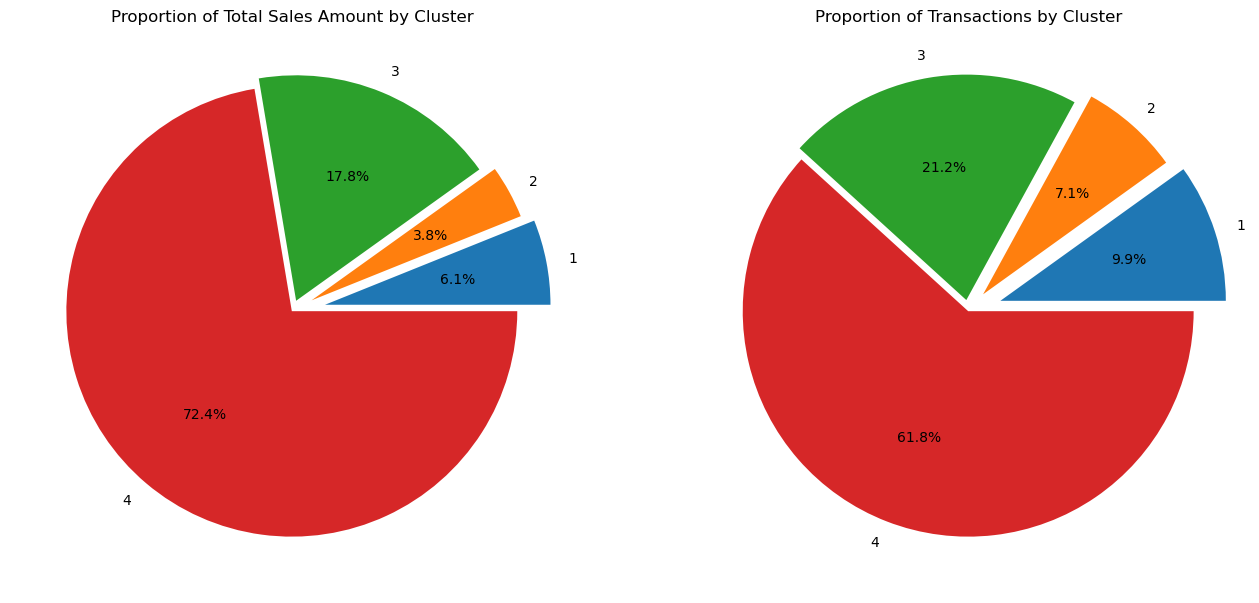

In [54]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,10))
#plt.figure(figsize=(10,8))
axes[0].pie(summary_cluster['Total_Amount'], labels=summary_cluster.index, autopct='%1.1f%%', explode = (0.15, 0.1, 0.05, 0))
axes[0].set_title('Proportion of Total Sales Amount by Cluster')
axes[1].pie(summary_cluster['Count_Invoice'], labels=summary_cluster.index, autopct='%1.1f%%', explode = (0.15, 0.1, 0.05, 0))
axes[1].set_title('Proportion of Transactions by Cluster');
plt.savefig("../images/totalsales&transactionsbyclusters.png");

#### Comment:
In terms of importance, we will recommend Cluster 4 > Cluster 1 > Cluster 3 > Cluster 2.

Cluster 4 contributed to about 72.4% of our sales volume, they also contributed to about 61.8% of the invoices.
Although Cluster 1 contributed less than Cluster 3, they are the uprising customers as they are new, and have lower Recency, with decent marketing efforts and strategies, it should be easier to retain them as compared to reconnecting with customers from Cluster 3 that are probably churned. As for customers from Cluster 2, we could study more into their behaviour to allow us to make more informed decisions about losing customers or failed marketing strategies. 

In [39]:
# export into 2 separate csv file

#retail_df_cluster.to_csv('./data/retail_cluster.csv', index = False)

In [40]:
#customers_rfm.reset_index().to_csv('./data/customer_cluster.csv',index=False)